In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
class SVM(BaseEstimator):
    
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    
    def predict(self, X):
        linear_output = np.dot(X, self.w - self.b)
        return np.sign(linear_output)

In [6]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [7]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2,
                           cluster_std=1.05, random_state=50)

y = np.where(y == 0, -1, 1)

idx = 900

X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

In [8]:
clf = SVM()
clf.fit(X_train, y_train)

In [9]:
y_predicted = clf.predict(X_test)
np.unique(y_predicted)

array([-1.,  1.])

In [10]:
print(accuracy(y_test, y_predicted))

0.78


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[52  0]
 [22 26]]


In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_test, y_predicted)

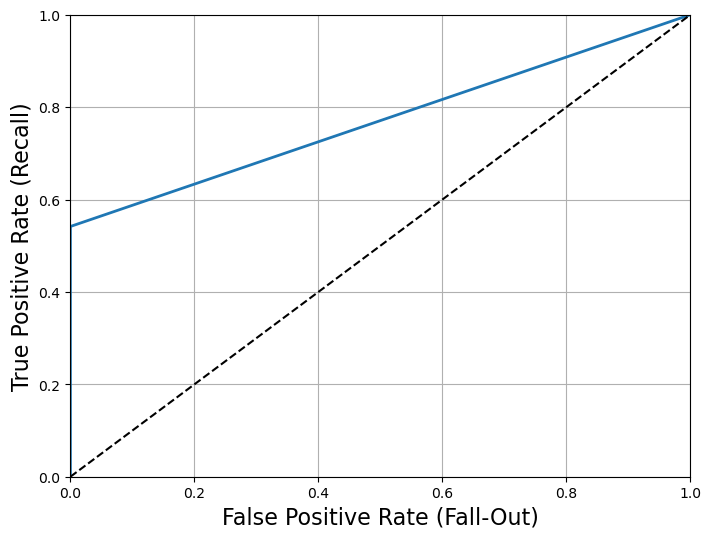

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predicted)

0.7708333333333333

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = ["Pregnancies" ,"Glucose" ,"BloodPressure" ,"SkinThickness" ,"Insulin" ,"BMI" ,"DiabetesPedigreeFunction" ,"Age" ,"Outcome"]
url =r'diabetes_data.csv'
diabetes_data = pd.read_csv(url, skiprows=9, header=None, names=cols)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,45,543,30.5,0.158,53,1
1,8,125,96,0,0,0.0,0.232,54,1
2,4,110,92,0,0,37.6,0.191,30,0
3,10,168,74,0,0,38.0,0.537,34,1
4,10,139,80,0,0,27.1,1.441,57,0


In [16]:
X = diabetes_data[cols[:-1]]
y = diabetes_data[cols[-1]]

<Axes: >

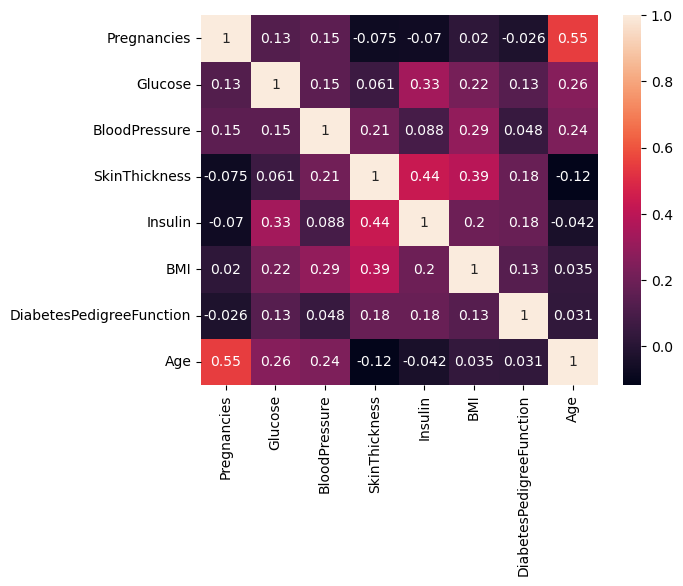

In [17]:
sns.heatmap(X.corr(), annot = True)

In [18]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
print(top_4_features)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  
0                     0.158   53  
[  2.  197.   70.   45.  543.   30.5  53. ]
SelectKBest(k=4, score_func=<function chi2 at 0x000001D3EE531F80>)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            2      197             70             45      543  30.5   53
1            8      125             96              0        0   0.0   54
2            4      110             92              0        0  37.6   30
3           10      168             74              0        0  38.0   34
4           10      139             80              0        0  27.1   57
[[197.  543.   30.5  53. ]
 [125.    0.    0.   54. ]
 [110.    0.   37.6  30. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
classifier = SVC(random_state=0, kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = classifier.predict(X_test)


In [23]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[79 12]
 [26 35]]
0.6481481481481481
0.75


__________

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [25]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2,
                           cluster_std=1.05, random_state=50)

In [26]:
y.shape

(1000,)

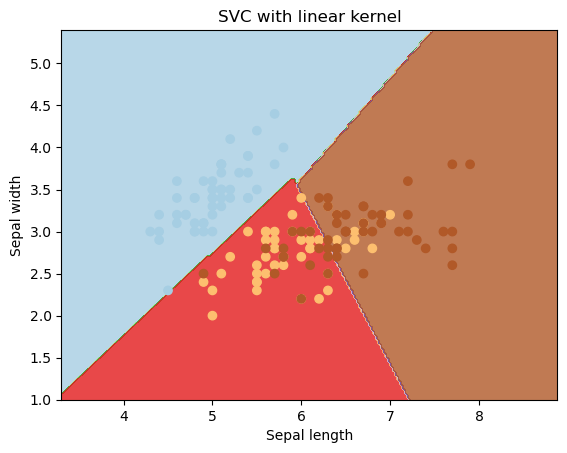

In [27]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [28]:
print(yy[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
